# Example for 'custom' LED spectrum and custom constellation


In [2]:
# Import Transmitter
from vlc_rm.transmitter import Transmitter
# Import Photodetector
from vlc_rm.photodetector import Photodetector
# Import Indoor Environment
from vlc_rm.indoorenv import Indoorenv
# Import REcursiveModel
from vlc_rm.recursivemodel import Recursivemodel
# Import Symbol Constants
from vlc_rm.constants import Constants as Kt

# Import numpy
import numpy as np

#Import luxpy   
import luxpy as lx

# Import Matplotlob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.facecolor']='white'

## Define transmitter, receiver and indoor space



 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [1.3400e+00 8.0000e-01 2.3000e+00] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 -1.0000e+00]] 
Lambert Number: 1.2999999523162842 
Central Wavelengths [nm]: [6.3000e+02 5.4000e+02 4.5800e+02] 
FWHM [nm]: [6.0000e+01 8.0000e+01 2.0000e+01]
Luminous Flux [lm]: 3441.0
Correlated Color Temperature: [[3.4024e+04]]
CIExy coordinates: [[2.7510e-01 2.2470e-01 5.0020e-01]]
ILER [W/lm]: 
 [[4.4326e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 2.0982e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 2.4620e-02]] 
Average Power per Channel Color: 
 [4.0552e+00 4.7442e+00 6.5239e+00] 
Total Power emmited by the Transmitter [W]: 
 15.323298705955821 



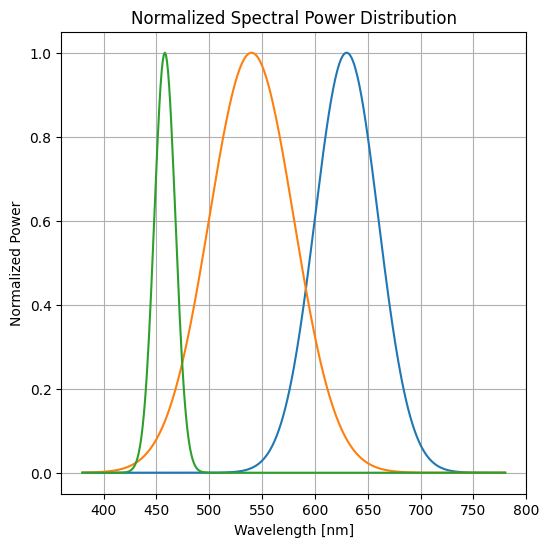

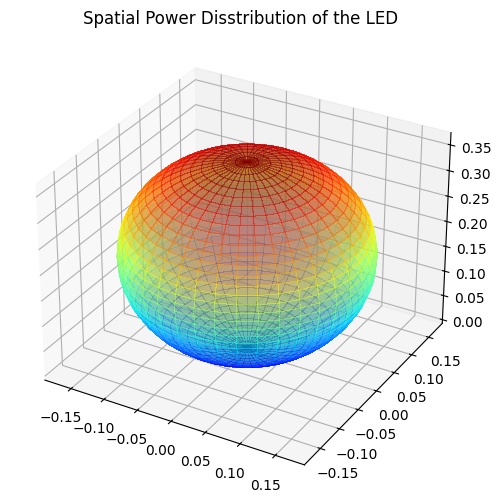

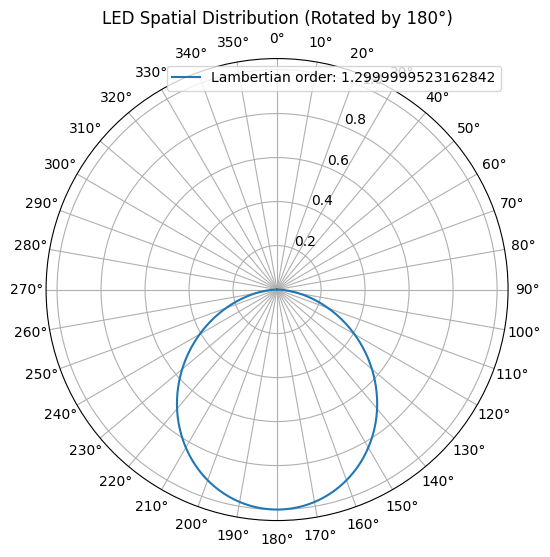


 List of parameters for photodetector PD1: 
Name: PD1 
Position [x y z]: [2.6300e+00 1.4500e+00 1.5000e-01] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 1.0000e+00]] 
Active Area[m2]: 3.333333370392211e-05 
FOV: 89.9000015258789 
Sensor: TCS3103-04
{'TCS3103-04', 'S10917-35GT'}

 Creating parameters of indoor environment ...
Parameters created!


 List of parameters for indoor envirionment Room: 
Name: Room
Size [x y z] -> [m]: [2.6800e+00 1.5000e+00 2.4200e+00] 
Order reflection: 10 
Resolution points [m]: 0.10000000149011612
Smaller Area [m^2]: 0.010287918150424957
Number of points: 2750



In [3]:
position3 = [0.05, 0.05, 0.15]
position5 = [1.34, 0.75, 0.15]
position7 = [2.63, 1.45, 0.15]

# Defining constellation
constellation_white = np.array(
        [[3.16358844e-01, 4.26319927e-01, 2.13159962e-01, 2.09778334e-01,
        1.75148367e-01, 4.22940043e-01, 1.03196345e-01, 5.66285160e-10,
        3.19739899e-01, 5.23606087e-02, 1.06579994e-01, 6.34364011e-01,
        5.32898957e-01, 7.41074607e-01, 8.86182555e-08, 1.15573626e-08],
       [5.75448689e-01, 5.78679790e-01, 7.91839914e-01, 6.82029070e-01,
        5.97070451e-01, 4.68868075e-01, 7.88610042e-01, 1.00499999e+00,
        6.85259818e-01, 6.65657115e-01, 8.98419959e-01, 3.60638073e-01,
        4.72098711e-01, 2.54188437e-01, 7.91692016e-01, 8.98419854e-01],
       [1.03192713e-01, 3.55674568e-08, 1.82999609e-08, 1.03192825e-01,
        2.22781445e-01, 1.03192128e-01, 1.03193854e-01, 3.89933005e-09,
        3.55672399e-08, 2.76982520e-01, 4.91691517e-09, 8.50250329e-08,
        7.74386525e-08, 8.10861622e-08, 2.13012113e-01, 1.06580060e-01]]
        )

# Create a transmitter-type object
transmitter = Transmitter(
        name="Led1",
        led_type='custom',
        reference='RGB-Phosphor',
        position=[1.34, 0.8, 2.30],
        normal=[0, 0, -1],
        mlambert=1.3,
        wavelengths=[630, 540, 458],
        fwhm=[60, 80, 20],
        constellation=constellation_white,
        luminous_flux=3441
                )
print(transmitter)
transmitter.plot_spd_normalized()
transmitter.plot_spatial_distribution()
transmitter.plot_spatial_distibution_planec0_c180()

pd = Photodetector(
    "PD1",
    position=position7,
    normal=[0, 0, 1],
    area=(1e-4)/3,
    fov=89.9,
#     sensor='S10917-35GT',
    sensor='TCS3103-04',
    idark=1e-12,
    gain=3e5
            )
print(pd)
print(pd.SENSORS_LIST)

room = Indoorenv(
    "Room",
    size=[2.68, 1.5, 2.42],
    no_reflections=10,
    resolution=1/10,
    ceiling=[0.90, 0.85, 0.85],
    west=[0.90, 0.85, 0.85],
    north=[0.15, 0.40, 0.15],
    east=[0.90, 0.85, 0.85],
    south=[0.70, 0.15, 0.15],
    floor=[0.10, 0.10, 0.10]
        )
room.create_environment(transmitter, pd)
print(room)


## Simulation of the indoor environment
The simulation of the indoor WDM-VLC is carried out by the 'RecursiveModel' module, which is defined as follows.


 Simulating indoor environment ...
Simulation done! 


|=============== Simulation results ================|
Name: ChannelModelA 
DC-Gain with respect to 1-W [W]: 
 [2.3261e-06 2.3029e-06 2.0607e-06] 
Crosstalk Matrix at 1-lm: 
[[8.0792e-09 1.4831e-09 1.3494e-09]
 [1.7474e-09 1.9856e-09 4.4271e-09]
 [2.2880e-09 1.1534e-09 1.8582e-08]] 
Crosstalk Matrix at 3441.0-lm: 
 [[2.7800e-05 5.1032e-06 4.6431e-06]
 [6.0129e-06 6.8326e-06 1.5234e-05]
 [7.8731e-06 3.9689e-06 6.3940e-05]] 
Crosstalk Matrix with photodetector gain of 300000.0: 
 [[8.3401e+00 1.5310e+00 1.3929e+00]
 [1.8039e+00 2.0498e+00 4.5701e+00]
 [2.3619e+00 1.1907e+00 1.9182e+01]] 
Lighting Parameters at 3441.0-lm 
Illuminance [lx]: [[2.3644e+02]] 
CIExyz: [[2.9993e-01 2.4719e-01 4.5288e-01]] 
CCT: [[1.0361e+04]] 
CRI: [[7.6381e+01]] 
Min-Distance at 3441.0-lm and photo-gain of 300000.0: 
 0.685510787648196 

Normalized H matrix:
[[4.3479e-01 7.9813e-02 7.2617e-02]
 [9.4040e-02 1.0686e-01 2.3825e-01]
 [1.2313e-01 6.2073e-02 1.0

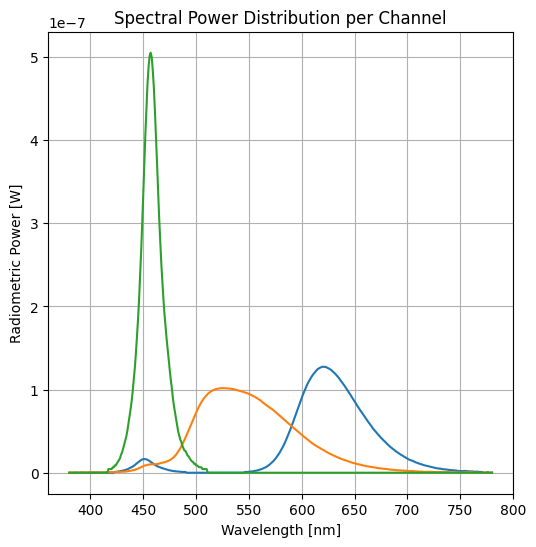

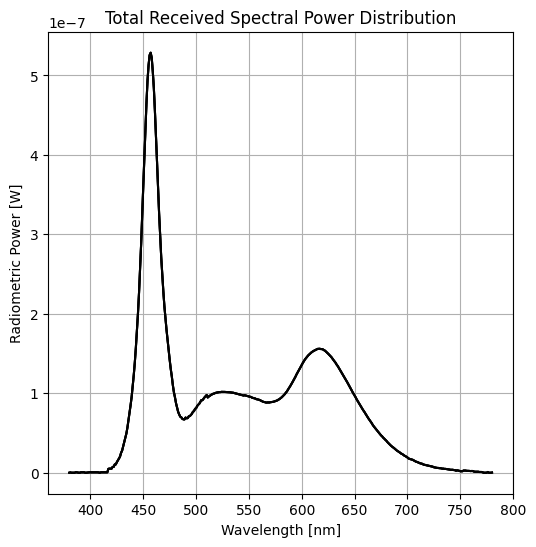

In [3]:
# Define Channel Model
channel_model = Recursivemodel(
    "ChannelModelA",
    transmitter,
    pd,
    room
    )

# --- Simulate indoor channel ------
channel_model.simulate_channel()
print(channel_model)   
Hnormalized = channel_model._norm_channelmatrix
print("Normalized H matrix:")
print(Hnormalized)
channel_model.plot_spd_channel()
channel_model.plot_spd_total()
